In [1]:
""" Author : Changhyun Kim 
    Starting date : 05/06/2022
"""

import numpy as np
import pandas as pd
import random 
import tensorflow as tf 
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
musicdb = pd.read_csv(
    'src/genres_v2.csv', usecols=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'tempo', 'song_name'], low_memory=False)

In [3]:
# Drop na value
musicDB = musicdb.dropna()
print(musicDB.dtypes)
print(musicDB.head())
print("Music data shape : ", musicDB.shape)
print(musicDB.describe())

danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
tempo               float64
song_name            object
dtype: object
   danceability  energy  loudness  speechiness  acousticness  \
0         0.831   0.814    -7.364       0.4200        0.0598   
1         0.719   0.493    -7.230       0.0794        0.4010   
2         0.850   0.893    -4.783       0.0623        0.0138   
3         0.476   0.781    -4.710       0.1030        0.0237   
4         0.798   0.624    -7.668       0.2930        0.2170   

   instrumentalness    tempo                                      song_name  
0          0.013400  156.985                            Mercury: Retrograde  
1          0.000000  115.080                                      Pathology  
2          0.000004  218.050                                       Symbiote  
3          0.000000  186.948  ProductOfDrugs (Prod. The Virus and

In [4]:
musicDB_columns = musicDB.columns

# devide dataset into predictors and target 
predictors = musicDB[musicDB_columns[musicDB_columns != 'song_name']]
target = musicDB['song_name']

#rand_number = random.randrange(0,21519)

<h3> Using loudness , temp finds dancability. <h3>

In [5]:
train_db = musicDB.sample(frac=0.8, random_state=0)
test_db = musicDB.drop(train_db.index)

train_x = train_db.copy()
test_x = test_db.copy()

train_y = train_db.pop('danceability')
test_y = test_db.pop('danceability')

# X_data = musicDB[['tempo','loudness']].transpose()
# Y_data = musicDB[['danceability']].transpose()

In [6]:
train_x.shape
test_x.shape

(4304, 8)

<h4> Linear regression <h4>
Linear regression with one variable which is loundness

In [7]:
loudness = np.array(train_x['loudness'])
loudness_normalizer = layers.Normalization(input_shape=[1,], axis=None)
loudness_normalizer.adapt(loudness)

Metal device set to: Apple M1 Max


2022-06-17 18:45:18.710106: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-17 18:45:18.710863: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-17 18:45:18.816754: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-17 18:45:18.878621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-17 18:45:18.894962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [9]:
#loud_model = tf.keras.models.load_model('loudness_dancability')
#model = keras.models.load_model('loudness_..

In [8]:
loud_model = tf.keras.Sequential([
    loudness_normalizer,
    layers.Dense(units=1)
])

loud_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [10]:
loud_model.predict(loudness[:10])

1/1 [==============================] - 0s 57ms/step


2022-06-17 18:47:20.599060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.6927776 ],
       [0.67357224],
       [0.6898019 ],
       [0.67689   ],
       [0.7035346 ],
       [0.56800276],
       [0.6468592 ],
       [0.61525506],
       [0.648501  ],
       [0.6485523 ]], dtype=float32)

In [11]:
loud_model.compile(
optimizer = tf.optimizers.Adam(learning_rate=0.1), loss = 'mean_absolute_error')

In [13]:
tranning = loud_model.fit(
train_x['loudness'],
train_y,
epochs=100,
verbose=2,
validation_split = 0.2)

Epoch 1/100
431/431 - 2s - loss: 0.1355 - val_loss: 0.1487 - 2s/epoch - 4ms/step
Epoch 2/100
431/431 - 1s - loss: 0.1337 - val_loss: 0.1484 - 1s/epoch - 3ms/step
Epoch 3/100
431/431 - 1s - loss: 0.1352 - val_loss: 0.1330 - 1s/epoch - 3ms/step
Epoch 4/100
431/431 - 1s - loss: 0.1330 - val_loss: 0.1384 - 1s/epoch - 3ms/step
Epoch 5/100
431/431 - 1s - loss: 0.1343 - val_loss: 0.1329 - 1s/epoch - 3ms/step
Epoch 6/100
431/431 - 1s - loss: 0.1341 - val_loss: 0.1310 - 1s/epoch - 3ms/step
Epoch 7/100
431/431 - 1s - loss: 0.1328 - val_loss: 0.1313 - 1s/epoch - 3ms/step
Epoch 8/100
431/431 - 1s - loss: 0.1331 - val_loss: 0.1428 - 1s/epoch - 3ms/step
Epoch 9/100
431/431 - 2s - loss: 0.1354 - val_loss: 0.1485 - 2s/epoch - 4ms/step
Epoch 10/100
431/431 - 1s - loss: 0.1342 - val_loss: 0.1402 - 1s/epoch - 3ms/step
Epoch 11/100
431/431 - 2s - loss: 0.1351 - val_loss: 0.1318 - 2s/epoch - 4ms/step
Epoch 12/100
431/431 - 1s - loss: 0.1334 - val_loss: 0.1330 - 1s/epoch - 3ms/step
Epoch 13/100
431/431 - 2s

In [14]:
hist = pd.DataFrame(tranning.history)
hist['epoch'] = tranning.epoch
hist.tail()

,loss,val_loss,epoch
95,0.134004,0.133061,95
96,0.133319,0.135679,96
97,0.135990,0.133946,97
98,0.134463,0.139500,98
99,0.133781,0.135827,99


https://www.tensorflow.org/tutorials/keras/regression

In [15]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [loudness]')
    plt.legend()
    plt.grid(True)

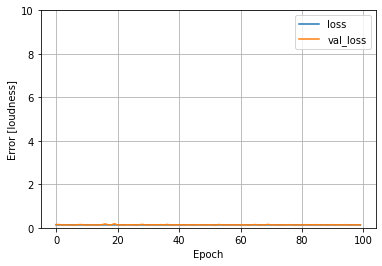

In [16]:
plot_loss(tranning)

In [17]:
test_results = {}

test_results['loud_model'] = loud_model.evaluate(
test_x['loudness'],
test_y, verbose =0)

In [18]:
x = tf.linspace(-50.0, 20, 151)
y = loud_model.predict(x)

5/5 [==============================] - 0s 3ms/step


2022-06-17 18:53:10.836594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [19]:
def plot_loudness(x, y):
    plt.scatter(train_x['loudness'], train_y, label = 'Data')
    plt.plot(x,y, color='k', label='Predictions')
    plt.xlabel('loudness')
    plt.ylabel('dancability')
    plt.legend()

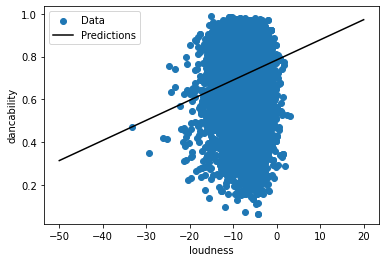

In [20]:
plot_loudness(x,y)

In [21]:
loud_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [22]:
loud_model.save('loudness_dancability')

INFO:tensorflow:Assets written to: loudness_dancability/assets


In [ ]:
#model = keras.models.load_model('loudness_..')